# <font color="#10403B"> CREDIT CARD CLUSTERING

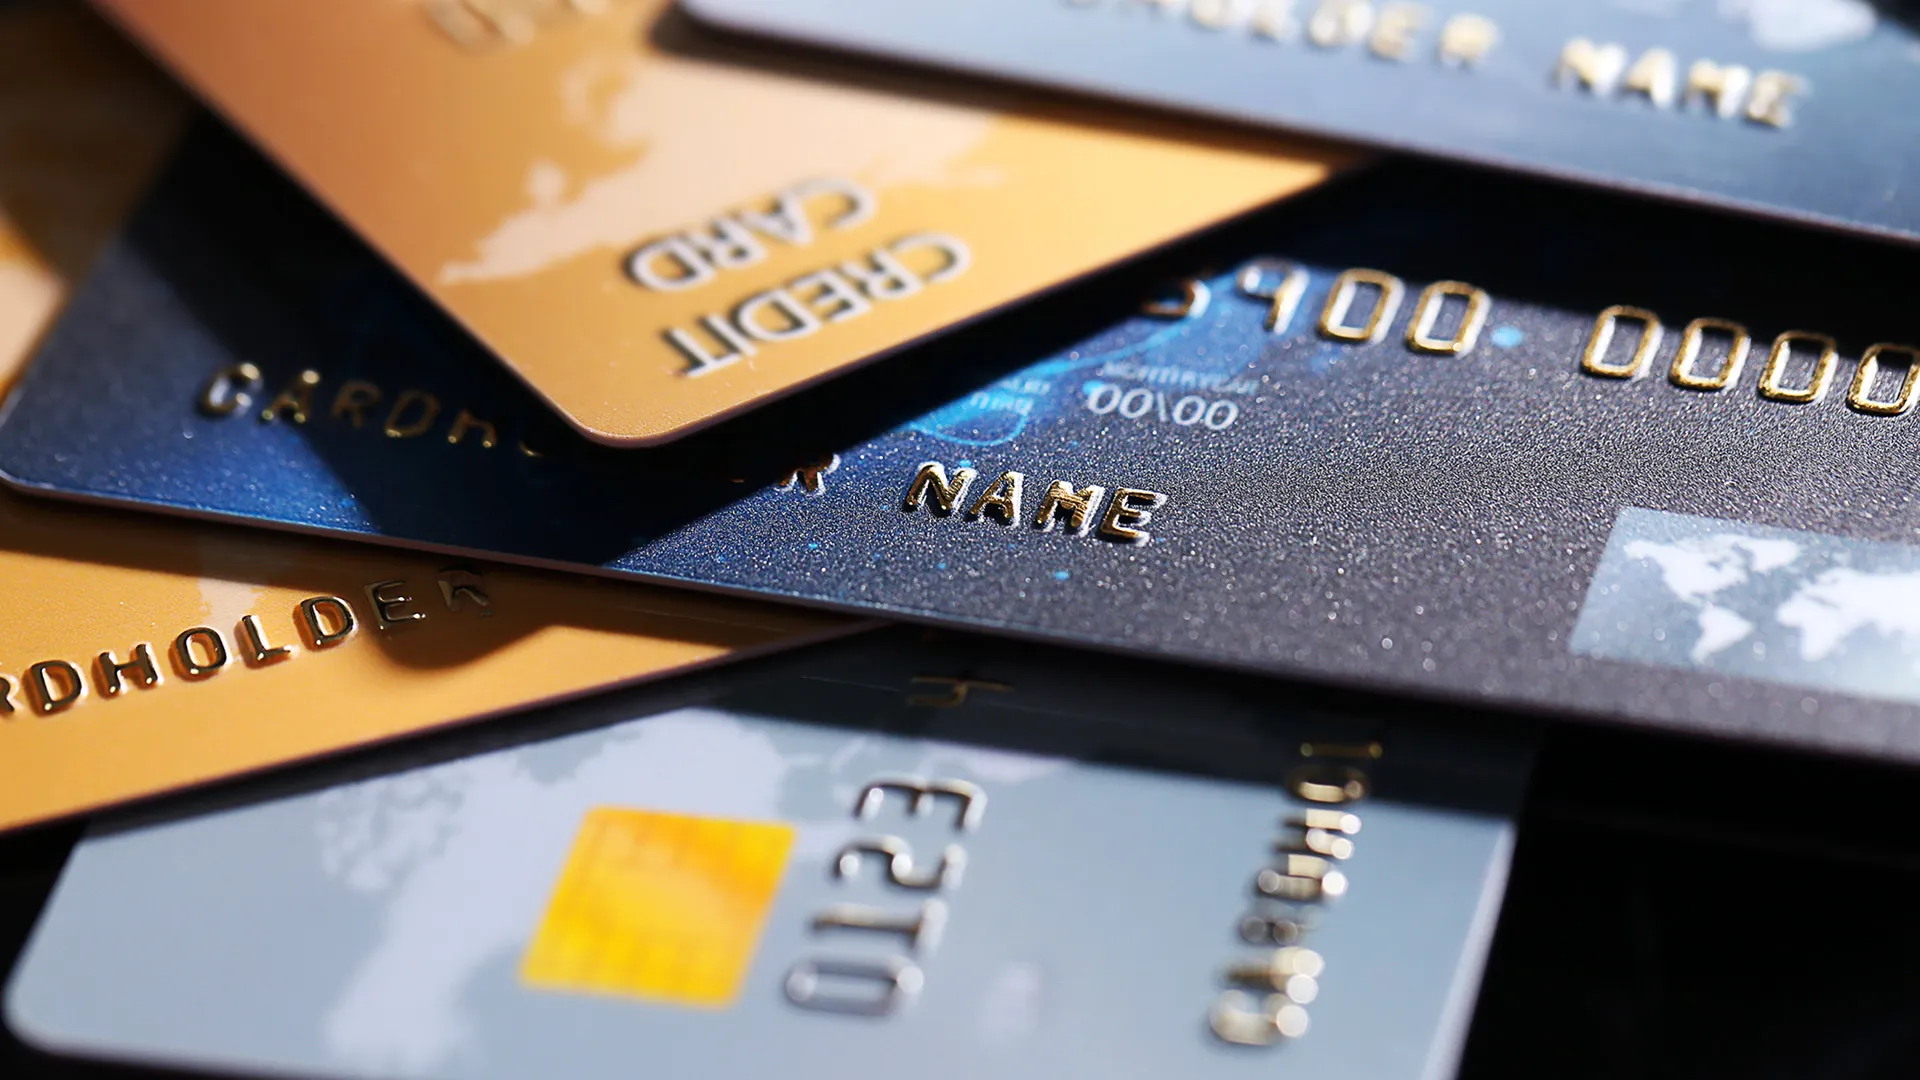

## <font color="#10403B"> Aim
The primary aim of this project is to cluster credit card customers based on their financial behavior and transaction patterns. By analyzing and grouping customers, we aim to uncover distinct segments that can help businesses tailor marketing strategies, optimize credit limits, and enhance customer retention. The clustering approach provides valuable insights into customer behavior, enabling data-driven decision-making in the financial domain.

## <font color="#10403B"> Dataset Overview
The dataset contains **17 features** that describe various financial activities and attributes of customers. Below is a brief explanation of the key features:

- **CUST_ID**: A unique identification number assigned to each customer.
- **BALANCE**: The current balance in the customer's bank account.
- **BALANCE_FREQUENCY**: Indicates how frequently the balance is updated (1 = frequently updated, 0 = rarely updated).
- **PURCHASES**: The total amount of purchases made by the customer.
- **ONEOFF_PURCHASES**: The highest amount spent on a one-time purchase.
- **INSTALLMENTS_PURCHASES**: The total amount spent on purchases made in installments.
- **CASH_ADVANCE**: The total cash advanced by the customer.
- **PURCHASES_FREQUENCY**: The frequency of purchases (1 = high frequency, 0 = low frequency).
- **ONEOFF_PURCHASES_FREQUENCY**: The frequency of one-time purchases (1 = high frequency, 0 = low frequency).
- **PURCHASES_INSTALLMENTS_FREQUENCY**: The frequency of purchases made in installments (1 = high frequency, 0 = low frequency).
- **CASH_ADVANCE_FREQUENCY**: The frequency of cash advances taken by the customer.
- **CASH_ADVANCE_TRX**: The total number of transactions related to cash advances.
- **PURCHASES_TRX**: The total number of purchase transactions.
- **CREDIT_LIMIT**: The credit limit assigned to the customer.
- **PAYMENTS**: The total amount of payments made by the customer.
- **MINIMUM_PAYMENTS**: The minimum amount paid by the customer.
- **PRC_FULL_PAYMENT**: The percentage of payments made in full by the customer.
- **TENURE**: The number of months the customer has been using the credit card.

## <font color="#10403B">  Requirements

In [48]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',None)
from scipy.cluster.hierarchy import dendrogram,linkage
import plotly.express as px

## <font color="#10403B"> Import Data

In [50]:
df=pd.read_csv('Credit card data/CC GENERAL.csv')

## <font color="#10403B"> EDA (Exploratory Data Analysis)

In [52]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [53]:
df.shape

(8950, 18)

In [54]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [56]:
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

## <font color="#10403B"> Feature Engineering

In [58]:
df.dropna(inplace=True)

In [59]:
df.shape

(8636, 18)

## <font color="#10403B"> Data Visualization

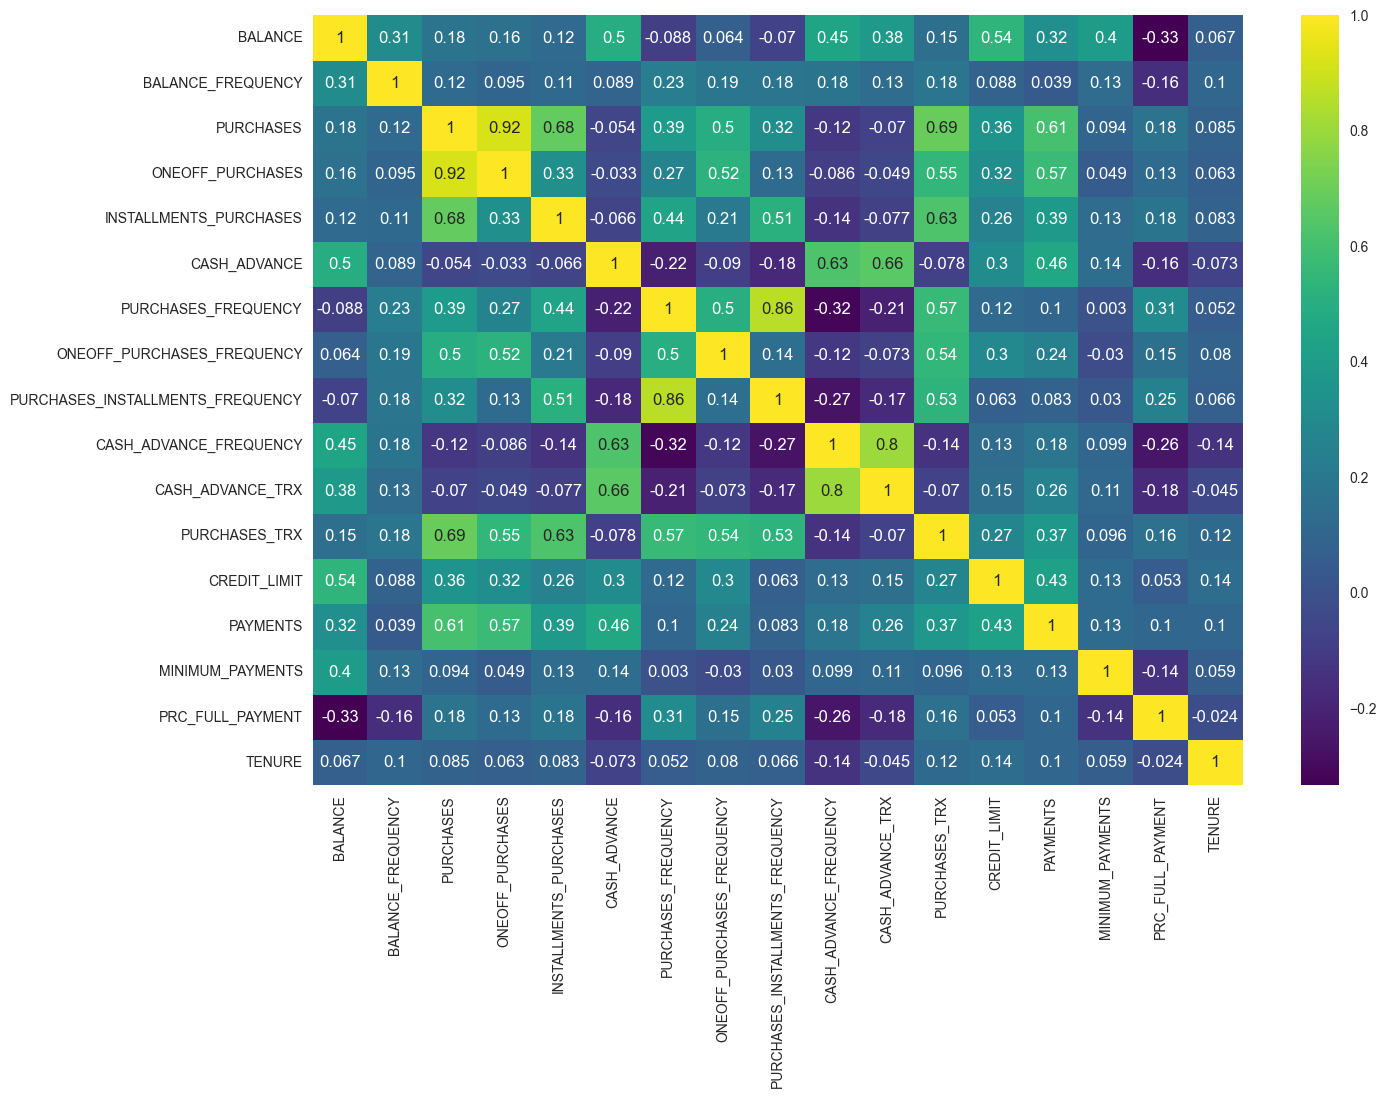

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis');

## <font color="#10403B">  Modelling

In [101]:
x=df.drop("CUST_ID",axis=1)

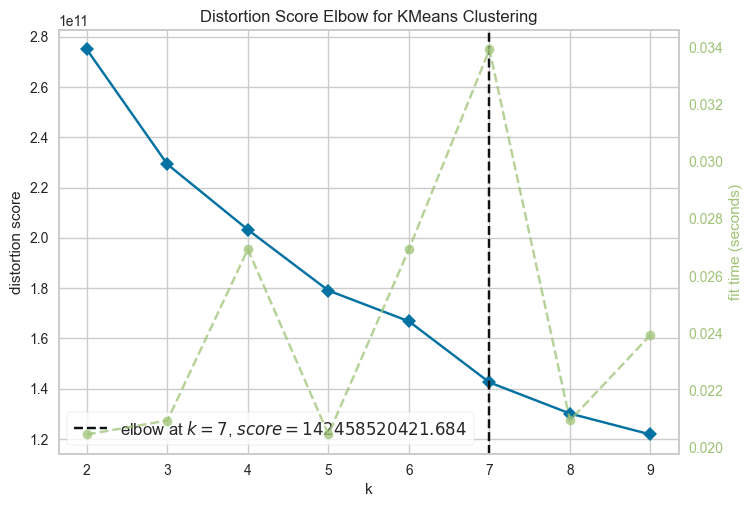

In [103]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show();

In [117]:
model=KMeans(7)
model=model.fit(x)
predicted=model.predict(x)

In [119]:
silhouette_score(x,predicted)

0.3883552587666886

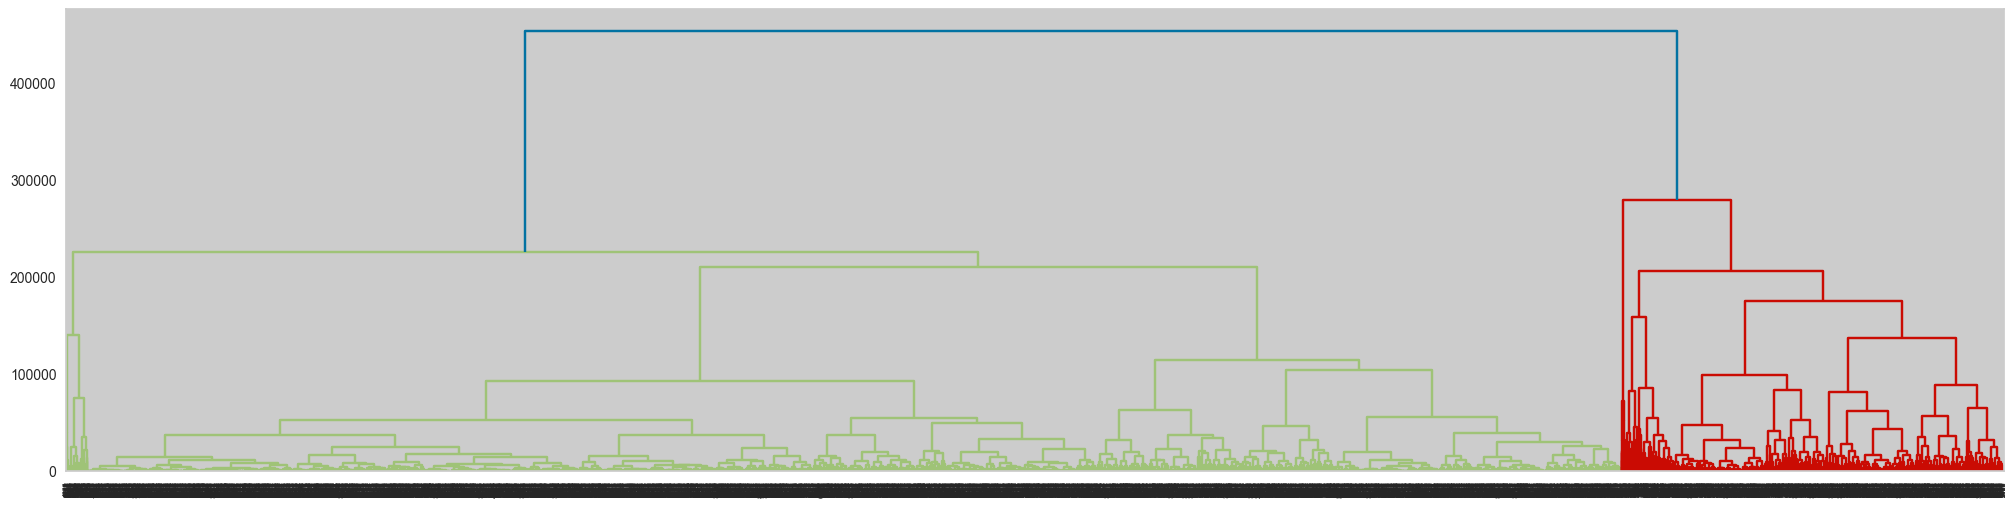

In [123]:
data=linkage(x,method="ward",metric="euclidean")
plt.figure(figsize=(25,6))
dendrogram(data);

In [124]:
df["Cluster"]=predicted

In [125]:
df["Cluster"].value_counts()

Cluster
0    5102
5    1736
6    1048
1     481
2     208
4      37
3      24
Name: count, dtype: int64

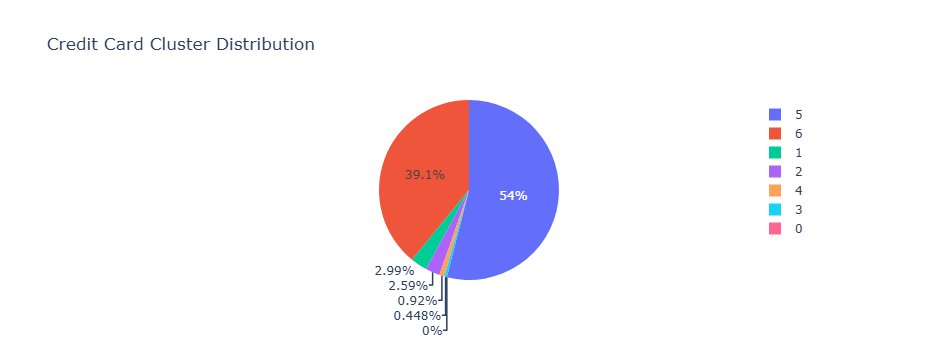

In [131]:
fig=px.pie(df,values="Cluster",names="Cluster",title="Credit Card Cluster Distribution")
fig.show()

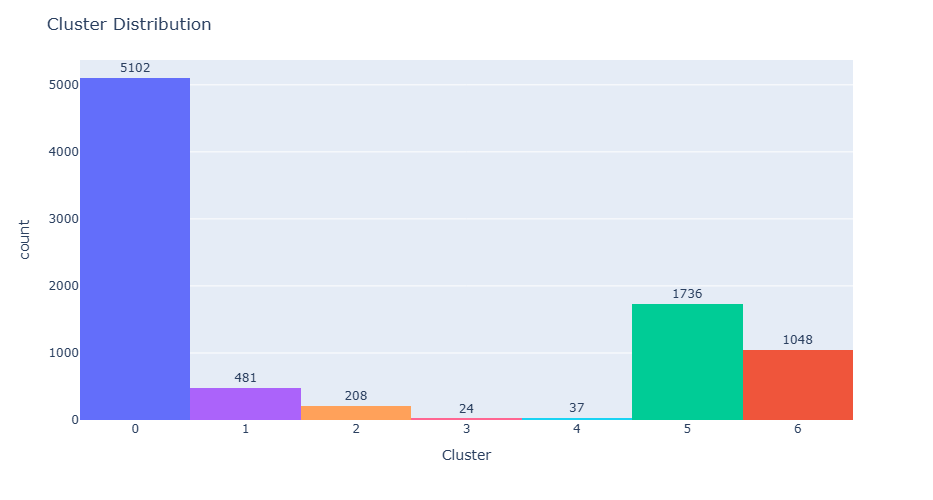

In [135]:
fig = px.histogram(df, x="Cluster",color="Cluster")
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(
    title="Cluster Distribution",
    showlegend=False,  
    width=1200,  
    height=500   
)
fig.update_xaxes(tickvals=[0, 1, 2, 3,4,5,6,7])
fig.show()

In [137]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        6  
2   622.066742        627.284787          0.000000      12        5  
4   678.334763        244.791237          0.000000      12        0  
5  1400.057770       2407.246035          0.000000      12        0

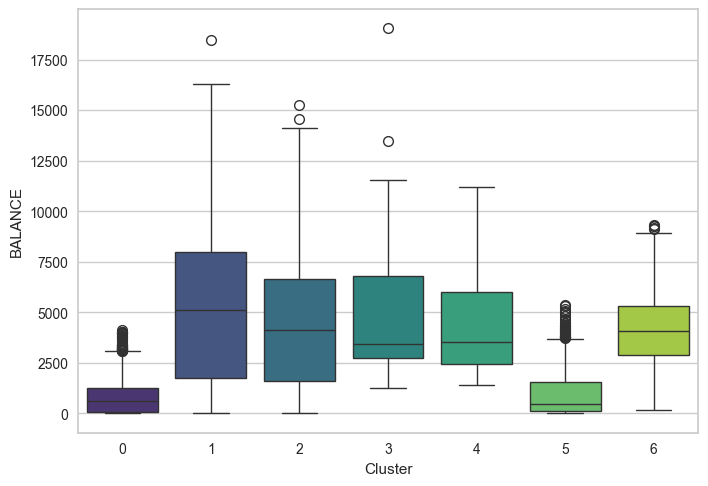

In [143]:
sns.boxplot(x="Cluster",y="BALANCE",data=df,palette="viridis");

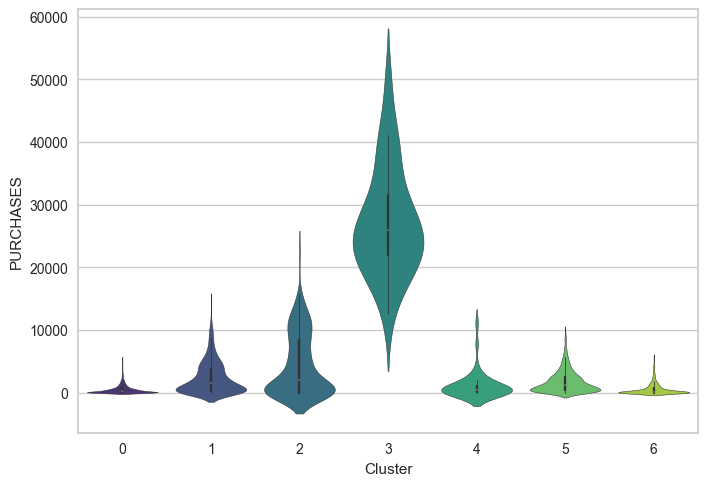

In [147]:
sns.violinplot(x="Cluster",y="PURCHASES",data=df,palette="viridis");

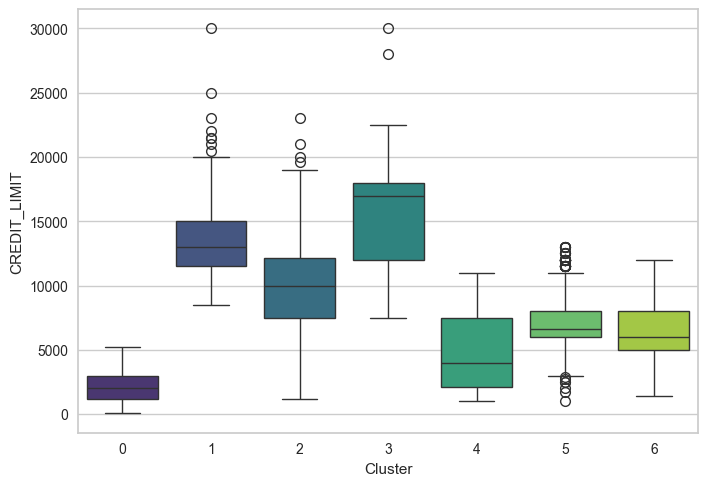

In [151]:
sns.boxplot(x="Cluster",y="CREDIT_LIMIT",data=df,palette="viridis");

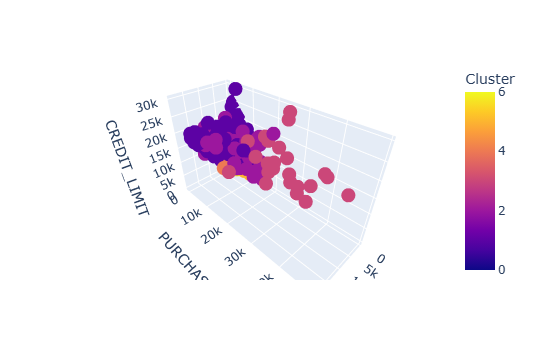

In [162]:
fig = px.scatter_3d(df, x='BALANCE', y='PURCHASES', z='CREDIT_LIMIT',
              color='Cluster')
fig.show()

### <font color="#10403B"> Cluster Distribution
The dataset was divided into a total of **7 clusters** with the following distribution:

- **Cluster 0:** 5102 members (largest cluster)
- **Cluster 5:** 1736 members
- **Cluster 6:** 1048 members
- **Cluster 1:** 481 members
- **Cluster 2:** 208 members
- **Cluster 4:** 37 members
- **Cluster 3:** 24 members (smallest cluster)

### <font color="#10403B"> Key Observations
From the box plots and violin plots:
1. **Balance**:
   - Cluster 0 has the lowest median balance, while Clusters 1, 2, 3, and 6 exhibit higher balances.
   - Cluster 3 shows notable outliers in balance.
   
2. **Purchases**:
   - Cluster 3 displays a significantly larger purchase distribution, indicating high activity among members of this cluster.
   - Cluster 0 and Cluster 6 have relatively lower purchase activity.

3. **Credit Limit**:
   - Cluster 3 and Cluster 1 have higher median credit limits, while Cluster 0 has the lowest median credit limit.
   - Clusters 2 and 4 show a moderate credit limit range with fewer outliers.

These insights suggest that the clusters represent diverse customer behaviors. For example:
- Cluster 3 may represent high-value customers with high spending and credit limits.
- Cluster 0 could signify low-value or dormant customers with minimal activity and credit exposure.
- Clusters 4 and 5 appear to represent niche groups with distinct spending patterns.

### <font color="#10403B"> Conclusion
The clustering model successfully segmented the customers into meaningful groups, allowing targeted strategies for marketing, credit limit adjustments, and customer retention. However, the silhouette score indicates that there may still be room for improvement in cluster separability. Further feature engineering or optimization could enhance the clustering performance.